In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import chi2

In [2]:
times = [10.06, 10.03, 10.02, 9.95, 9.93, 9.83, 9.93, 9.93, 9.79, 9.92, 9.90, 9.86, 9.85, 9.84, 9.79, 9.78, 9.77, 9.77, 9.77, 9.77, 9.74, 9.72, 9.69, 9.58]
years = [1964, 1968, 1968, 1968, 1983, 1987, 1987, 1988, 1988, 1988, 1991, 1991, 1994, 1996, 1999, 2002, 2005, 2006, 2006, 2006, 2007, 2008, 2008, 2009]
df = pd.DataFrame({"Time":times, "Date":years})

Intercept (b0):
 [24.64808957]
Slope (b1):
 [[-0.00743113]]
R² = 0.836, MSE = 0.00209


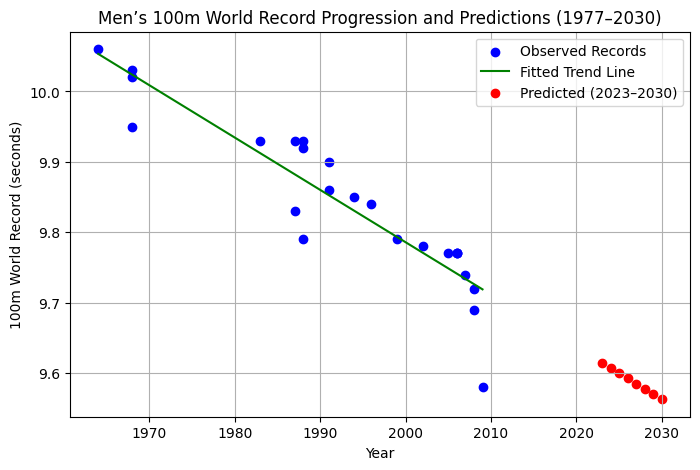

In [3]:
# Reshape years for sklearn
x_values = np.array(years).reshape(-1, 1)
y_values = np.array(times).reshape(-1, 1)
# Create test years (2023–2030)
x_values_test = np.array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)

# Create linear regression object
regression_time = linear_model.LinearRegression()

# Train the model using the training sets
regression_time.fit(x_values, y_values)

# Make predictions using the testing set
y_pred_future = regression_time.predict(x_values_test)
y_pred = regression_time.predict(x_values)
mse = mean_squared_error(y_values, y_pred)
r2 = r2_score(y_values, y_pred)

print('Intercept (b0):\n', regression_time.intercept_)
print('Slope (b1):\n', regression_time.coef_)
print(f"R² = {r2:.3f}, MSE = {mse:.5f}")
# Plot results
plt.figure(figsize=(8,5))
plt.scatter(years, times, color='blue', label="Observed Records")
plt.plot(years, y_pred, color='green', label="Fitted Trend Line")
plt.scatter(x_values_test, y_pred_future, color='red', marker='o', label="Predicted (2023–2030)")
plt.xlabel("Year")
plt.ylabel("100m World Record (seconds)")
plt.title("Men’s 100m World Record Progression and Predictions (1977–2030)")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Display predictions in a clean format
print("Predicted 100m World Records:")
for yr, t in zip(x_values_test.flatten(), y_pred_future.flatten()):
    print(f"  {yr}: {t:.2f} s")

Predicted 100m World Records:
  2023: 9.61 s
  2024: 9.61 s
  2025: 9.60 s
  2026: 9.59 s
  2027: 9.59 s
  2028: 9.58 s
  2029: 9.57 s
  2030: 9.56 s
